<a href="https://colab.research.google.com/github/aayisha-muhammed/Datasceince/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1: Load the Dataset
In this step, we are loading the dataset into the Python environment using the `pandas` library. The dataset is uploaded from the local machine using the `files.upload()` function, which prompts us to choose the file. Once the dataset is loaded, we use the `head()` function to display the first few rows and understand the structure of the data.


In [ ]:

import pandas as pd
from google.colab import files
uploaded = files.upload()
data = pd.read_csv(list(uploaded.keys())[0])
data.head()


Saving force2020_data.csv to force2020_data (1).csv


,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


### Step 2: Handle Missing Values
In this step, we check the dataset for missing values. Missing values can affect the model's performance, so we will clean the dataset accordingly. The column `NPHI` has a significant number of missing values, so it will be dropped. For the columns `PEF` and `DTC`, we will replace missing values with the median of the respective columns to preserve the data.




In [ ]:
data.isnull().sum()

data_cleaned = data.drop(columns=['NPHI'])

data_cleaned['PEF'].fillna(data_cleaned['PEF'].median(), inplace=True)
data_cleaned['DTC'].fillna(data_cleaned['DTC'].median(), inplace=True)
data_cleaned.isnull().sum()


<ipython-input-6-859b71e819da>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['PEF'].fillna(data_cleaned['PEF'].median(), inplace=True)
<ipython-input-6-859b71e819da>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

,0
RHOB,0
GR,0
DEPTH_MD,0
PEF,0
DTC,0


### Step 3: Standardize the Data
To ensure all features have a uniform scale, we apply data standardization using `StandardScaler` from `sklearn.preprocessing`. This process transforms the features so that they have a mean of 0 and a standard deviation of 1, which is crucial for distance-based algorithms like KMeans.


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned.drop(columns=['DEPTH_MD']))
data_scaled_df = pd.DataFrame(data_scaled, columns=data_cleaned.columns.drop('DEPTH_MD'))
data_scaled_df.head()


,RHOB,GR,PEF,DTC
0,-0.759999,0.571087,7.186107,1.176153
1,-0.741163,0.538331,6.557513,1.158889
2,-0.718560,0.383248,7.873601,1.144827
3,-0.734045,0.315393,11.811559,1.144036
4,-0.773944,0.275241,14.397266,1.143346


### Step 4: Apply KMeans Clustering and Find Optimum Clusters
To determine the best number of clusters for the KMeans algorithm, we use the **Elbow Method**. This method helps identify the point where adding more clusters does not significantly reduce the within-cluster sum of squares (WCSS). We compute WCSS for cluster counts from 1 to 10 and plot the results.


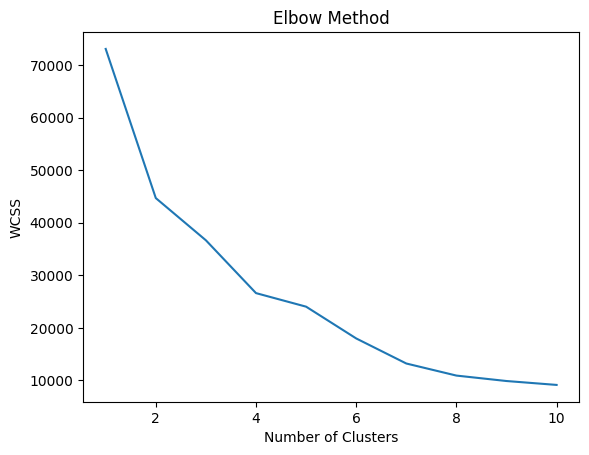

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


### Step 5: Apply KMeans with Optimal Clusters
Based on the Elbow Method, we select the optimal number of clusters and apply KMeans clustering. We fit the KMeans model to the standardized data with the chosen number of clusters, and then we add the resulting cluster labels back to the original dataset.


In [ ]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(data_scaled_df)


data_cleaned['Cluster'] = kmeans.labels_


data_cleaned.head()


,RHOB,GR,DEPTH_MD,PEF,DTC,Cluster
0,1.884186,80.200851,494.528,20.915468,161.131180,2
1,1.889794,79.262886,494.680,19.383013,160.603470,0
2,1.896523,74.821999,494.832,22.591518,160.173615,2
3,1.891913,72.878922,494.984,32.191910,160.149429,2
4,1.880034,71.729141,495.136,38.495632,160.128342,2
